In [50]:
# IMPORT NECESSARY LIBRARIES
import librosa
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm
import seaborn as sns
import os, glob, pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [11]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft=np.abs(librosa.stft(X))
    result=np.array([])
    mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    result=np.hstack((result, mfccs))
    chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    result=np.hstack((result, chroma))
    mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    result=np.hstack((result, mel))
    return result

In [12]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

def gender(g):
    if int(g[0:2]) % 2 == 0:
        return 'female'
    else:
        return 'male'


In [15]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in tqdm(glob.glob("Y:/Masters_Content/Deep_Learning/Project/Data/Actor_*/*.wav")):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]] + '_' + gender(file_name.split("-")[-1])
        feature=extract_feature(file)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=1)

In [27]:
X_train, X_test, y_train, y_test = load_data()


  9%|███████                                                                        | 129/1440 [00:11<01:50, 11.86it/s]


 18%|██████████████                                                                 | 256/1440 [00:22<01:53, 10.45it/s]


 27%|█████████████████████▎                                                         | 388/1440 [00:33<01:26, 12.19it/s]


 36%|████████████████████████████▌                                                  | 520/1440 [00:43<01:09, 13.30it/s]


 45%|███████████████████████████████████▊                                           | 652/1440 [00:54<01:02, 12.71it/s]


 54%|███████████████████████████████████████████                                    | 784/1440 [01:04<00:49, 13.14it/s]


 64%|██████████████████████████████████████████████████▎                            | 916/1440 [01:15<00:43, 12.13it/s]


 73%|████████████████████████████████████████████████████████▊                     | 1048/1440 [01:26<00:34, 11.53it/s]


 82%|███████████████████████████████████████████████████████████████▉              | 1180/1440 [01:37<00:21, 11.95it/s]


 91%|███████████████████████████████████████████████████████████████████████       | 1312/1440 [01:48<00:11, 11.28it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 1440/1440 [01:59<00:00, 12.06it/s]


In [28]:
print((X_train.shape[0], X_test.shape[0]))

(1152, 288)


In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f'Features extracted: {X_train.shape[1]}')

Features extracted: 180


In [46]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [47]:
predicted = model.predict(X_test)

In [53]:
accuracy = metrics.accuracy_score(y_test, predicted)
accuracy

0.3645833333333333

In [59]:
from sklearn.metrics import classification_report
print('                       Classification Report           ')
print(classification_report(y_test, predicted))

                       Classification Report           
                  precision    recall  f1-score   support

    angry_female       0.50      0.11      0.18        18
      angry_male       0.20      0.44      0.28         9
     calm_female       0.38      0.93      0.54        15
       calm_male       0.30      0.76      0.43        17
  disgust_female       0.23      0.41      0.29        17
    disgust_male       0.46      0.21      0.29        29
  fearful_female       0.61      0.46      0.52        24
    fearful_male       0.67      0.38      0.48        21
    happy_female       0.50      0.14      0.22        21
      happy_male       0.44      0.35      0.39        23
  neutral_female       0.00      0.00      0.00        10
    neutral_male       0.00      0.00      0.00         7
      sad_female       0.67      0.21      0.32        19
        sad_male       0.21      0.32      0.25        22
surprised_female       0.29      0.54      0.38        13
  surprised_mal

C:\Users\yaswa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


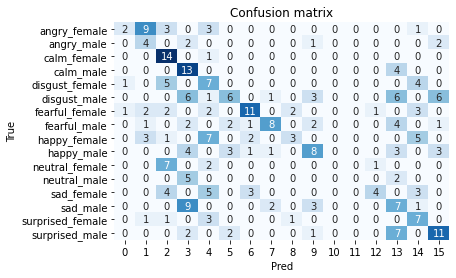

In [51]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

In [58]:
from collections import Counter
Counter(y_test)

Counter({'disgust_female': 17,
         'angry_female': 18,
         'fearful_male': 21,
         'surprised_male': 23,
         'surprised_female': 13,
         'fearful_female': 24,
         'neutral_female': 10,
         'neutral_male': 7,
         'happy_female': 21,
         'disgust_male': 29,
         'sad_female': 19,
         'angry_male': 9,
         'sad_male': 22,
         'happy_male': 23,
         'calm_male': 17,
         'calm_female': 15})